In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [29]:
data = pd.read_csv("/content/data.csv")

In [30]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
data.drop(["Unnamed: 32","id"],axis=1, inplace=True)

In [33]:
data.diagnosis = [1 if each == 'M' else 0 for each in data.diagnosis]

In [34]:
y = data.diagnosis.values #values methodu ile numpy array'e çevrilir.
x_data = data.drop(["diagnosis"],axis=1)

In [35]:
x = ((x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))).values

In [36]:
x

array([[4.22896098e-03, 2.44005642e-03, 2.88669488e-02, ...,
        6.23883404e-05, 1.08157029e-04, 2.79501646e-05],
       [4.83544899e-03, 4.17724495e-03, 3.12411848e-02, ...,
        4.37235543e-05, 6.46450400e-05, 2.09261871e-05],
       [4.62858486e-03, 4.99529854e-03, 3.05594734e-02, ...,
        5.71227080e-05, 8.49318289e-05, 2.05876822e-05],
       ...,
       [3.90220969e-03, 6.60084626e-03, 2.54583921e-02, ...,
        3.33333333e-05, 5.21391631e-05, 1.83826986e-05],
       [4.84250118e-03, 6.89468735e-03, 3.29337094e-02, ...,
        6.22943112e-05, 9.60742830e-05, 2.91490362e-05],
       [1.82416549e-03, 5.76868829e-03, 1.12646921e-02, ...,
        0.00000000e+00, 6.74894217e-05, 1.65467795e-05]])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size=0.20,random_state=42)

In [38]:
x_train = x_train.T
x_train.shape

(30, 455)

In [39]:
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

In [40]:
print(x_test.shape)

(30, 114)


In [41]:
y_train.shape

(455,)

In [42]:
y_test.shape

(114,)

In [43]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [44]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [45]:
sigmoid(0)

0.5

In [46]:
def forward_backward_propagation(w,b,x_train,y_train):

    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]

    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}

    return cost,gradients

In [47]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [48]:
def predict(w,b,x_test):

    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1])) #(1,114)

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.692873
Cost after iteration 10: 0.592372
Cost after iteration 20: 0.539608
Cost after iteration 30: 0.500537
Cost after iteration 40: 0.470565
Cost after iteration 50: 0.446850
Cost after iteration 60: 0.427603
Cost after iteration 70: 0.411654
Cost after iteration 80: 0.398209
Cost after iteration 90: 0.386712
Cost after iteration 100: 0.376758
Cost after iteration 110: 0.368050
Cost after iteration 120: 0.360363
Cost after iteration 130: 0.353523
Cost after iteration 140: 0.347392
Cost after iteration 150: 0.341864
Cost after iteration 160: 0.336851
Cost after iteration 170: 0.332282
Cost after iteration 180: 0.328099
Cost after iteration 190: 0.324254
Cost after iteration 200: 0.320705
Cost after iteration 210: 0.317420
Cost after iteration 220: 0.314368
Cost after iteration 230: 0.311525
Cost after iteration 240: 0.308870
Cost after iteration 250: 0.306384
Cost after iteration 260: 0.304050
Cost after iteration 270: 0.301856
Cost after iteration 280: 0.299

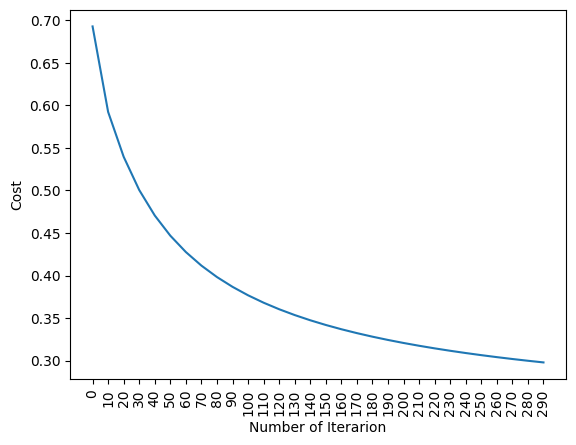

test accuracy: 93.85964912280701 %


In [49]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)

    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 3, num_iterations = 300)

In [50]:
from sklearn import linear_model
lr = linear_model.LogisticRegression(random_state=42,max_iter=40)
lr.fit(x_train.T,y_train.T)

LogisticRegression(max_iter=40, random_state=42)

In [51]:
y_pred = lr.predict(x_test.T)

In [52]:
print("test accuracy {}".format(lr.score(x_test.T,y_test.T)))

test accuracy 0.9035087719298246
